In [24]:
# Import pandas, numpy, scip.stats, plotly

import numpy as np
import seaborn as sns
import plotly.express as px
from scipy import stats
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

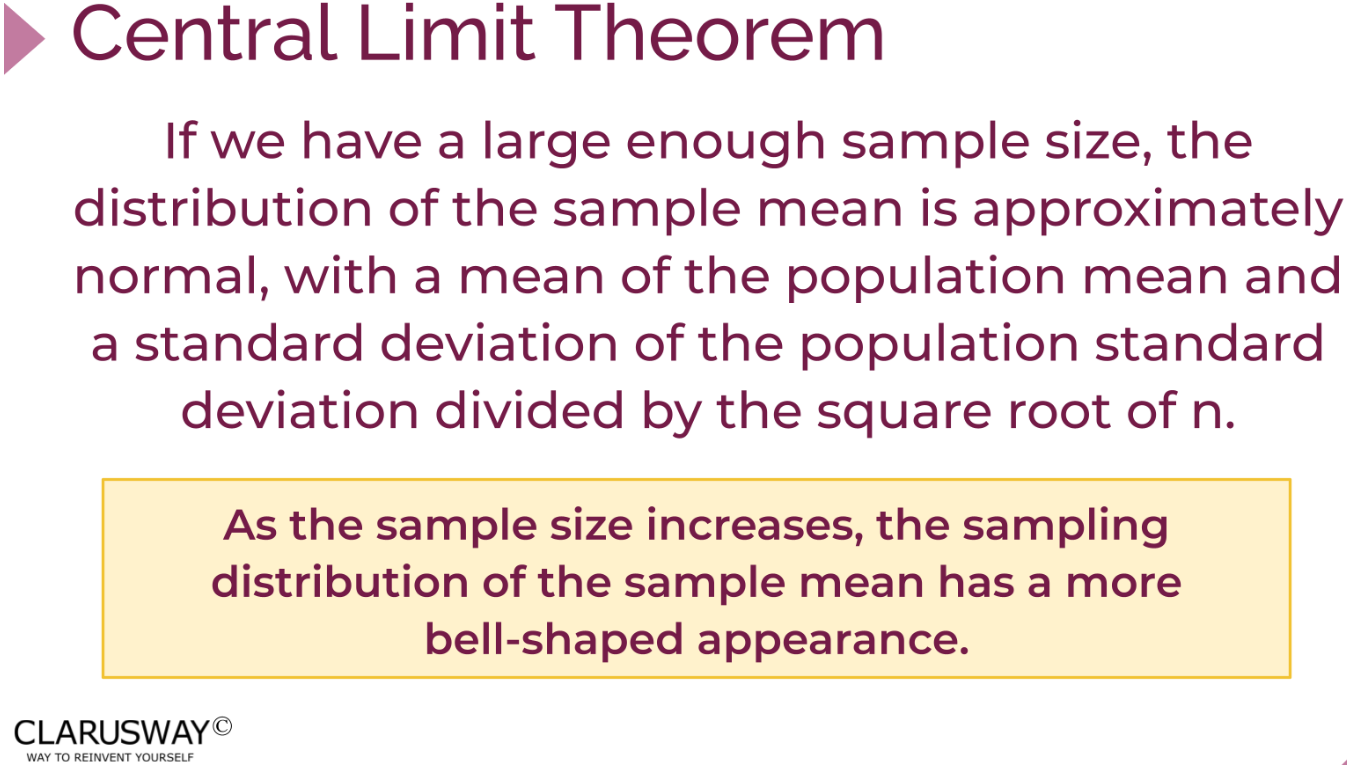

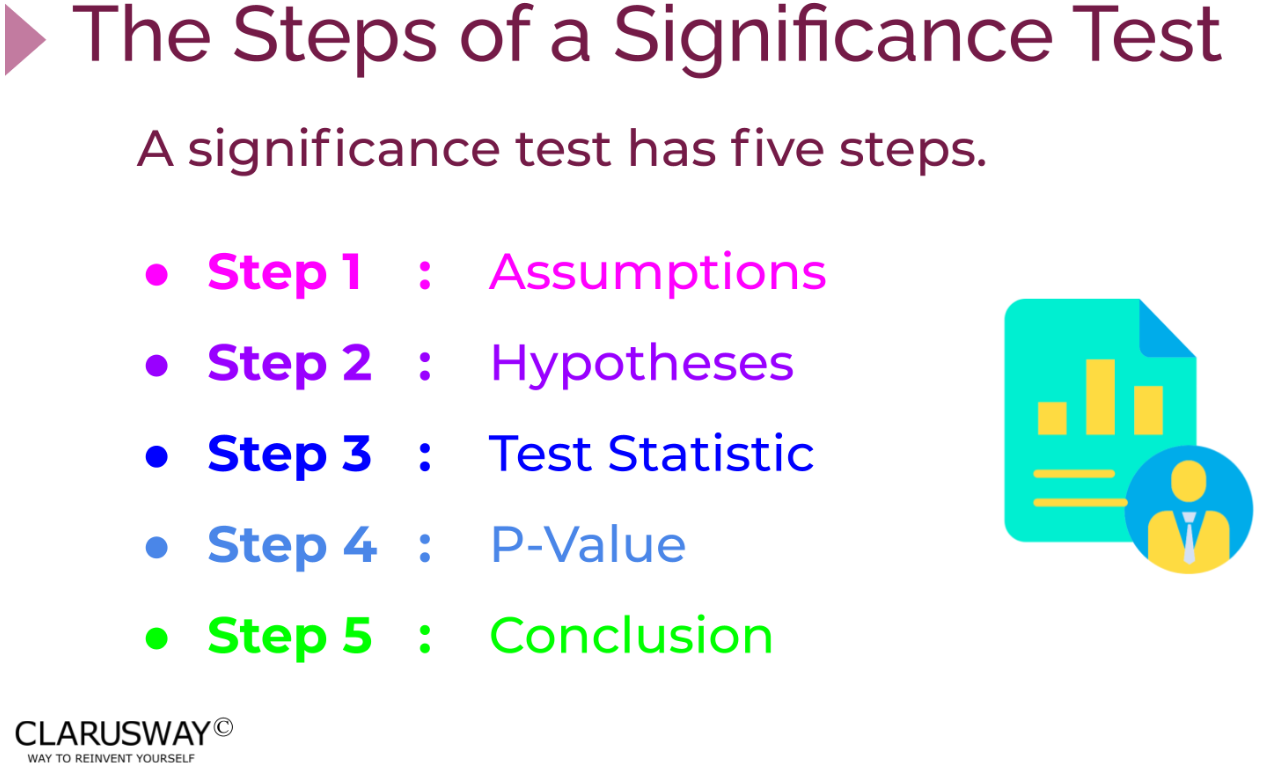

# One Sample T Test Sample Questions

For more information about One Sample T Test, please visit the links below:

https://blog.minitab.com/en/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests

https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/one-sample-t-test.html#:~:text=The%20one%2Dsample%20t%2Dtest%20is%20a%20statistical%20hypothesis%20test,different%20from%20a%20specific%20value.

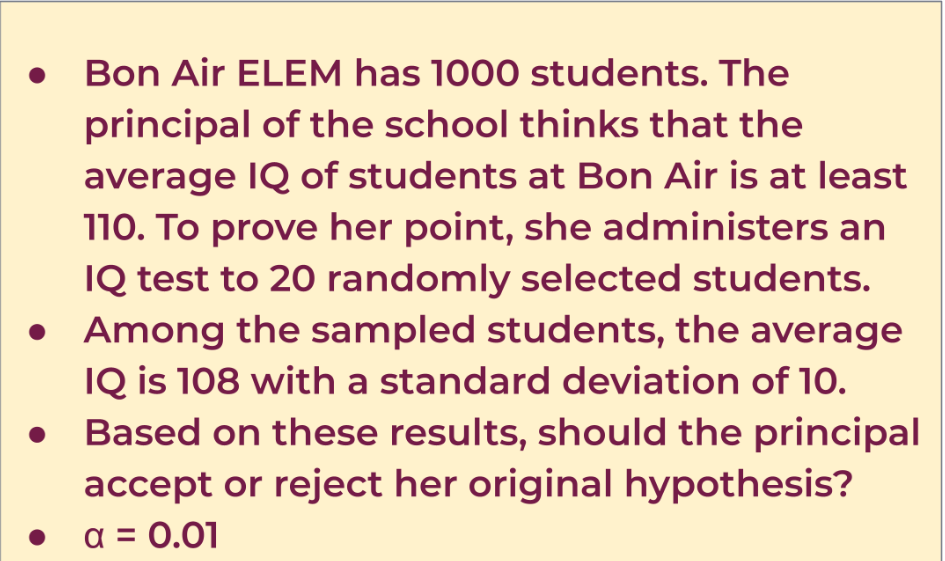

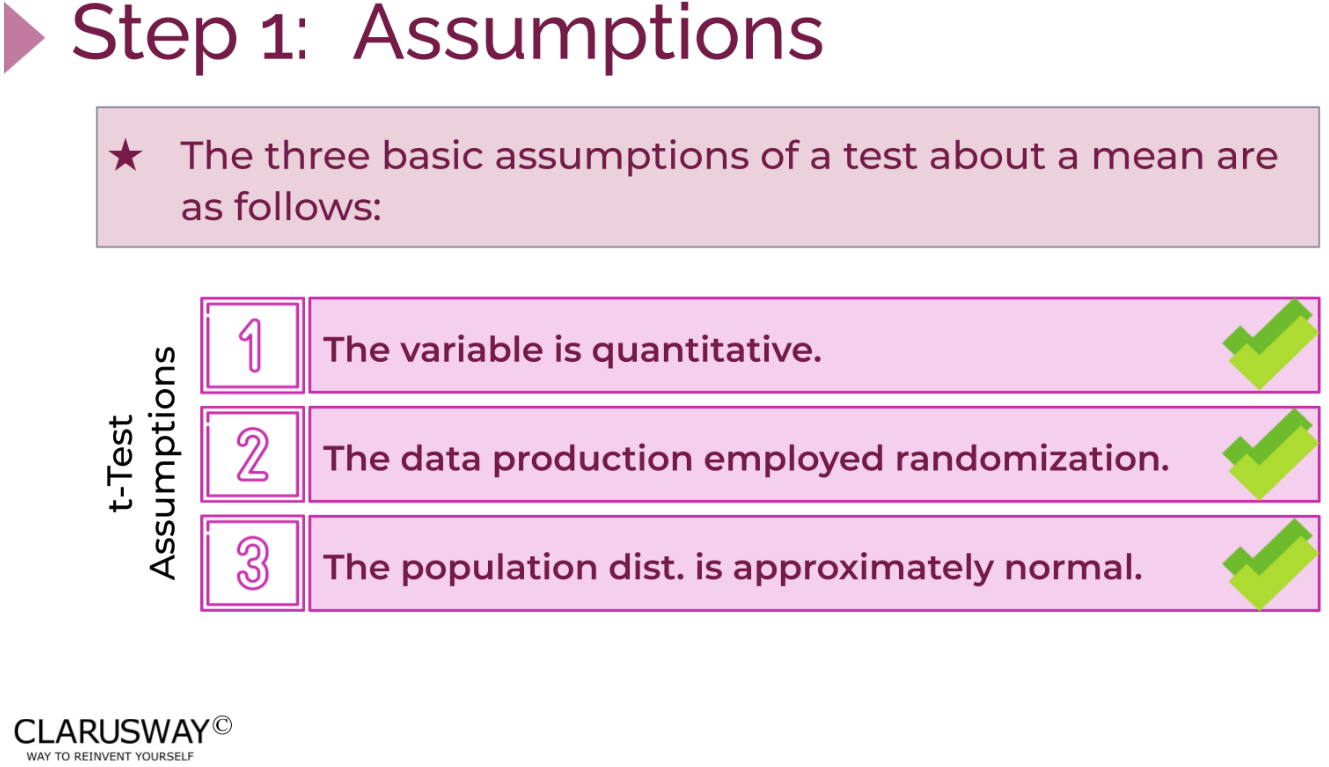

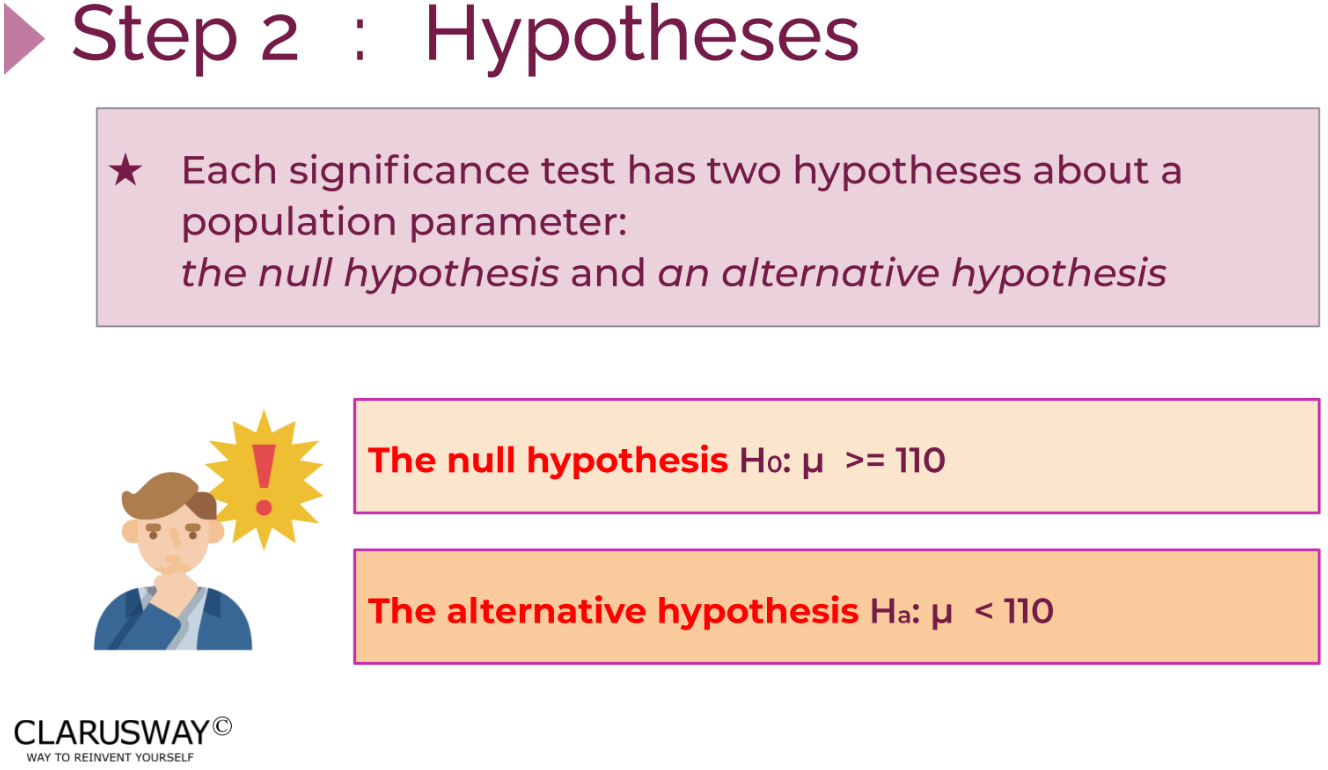

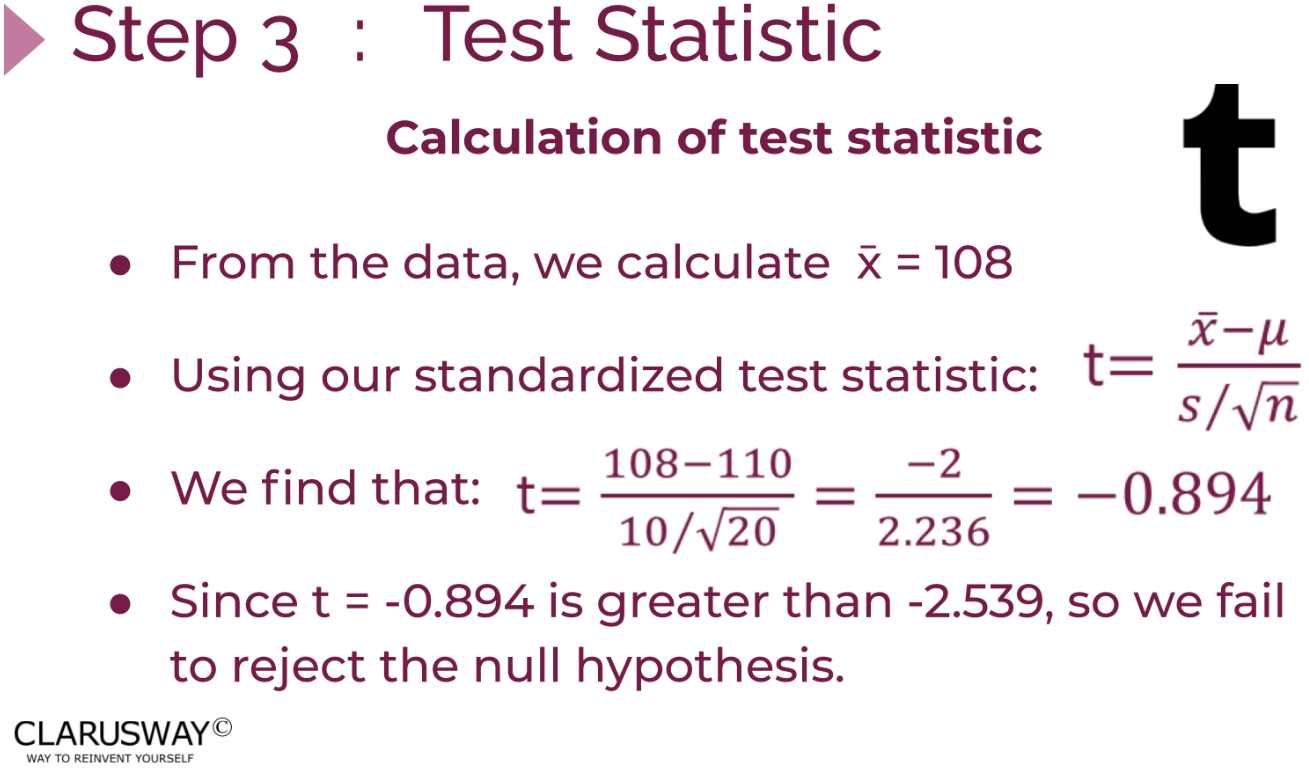

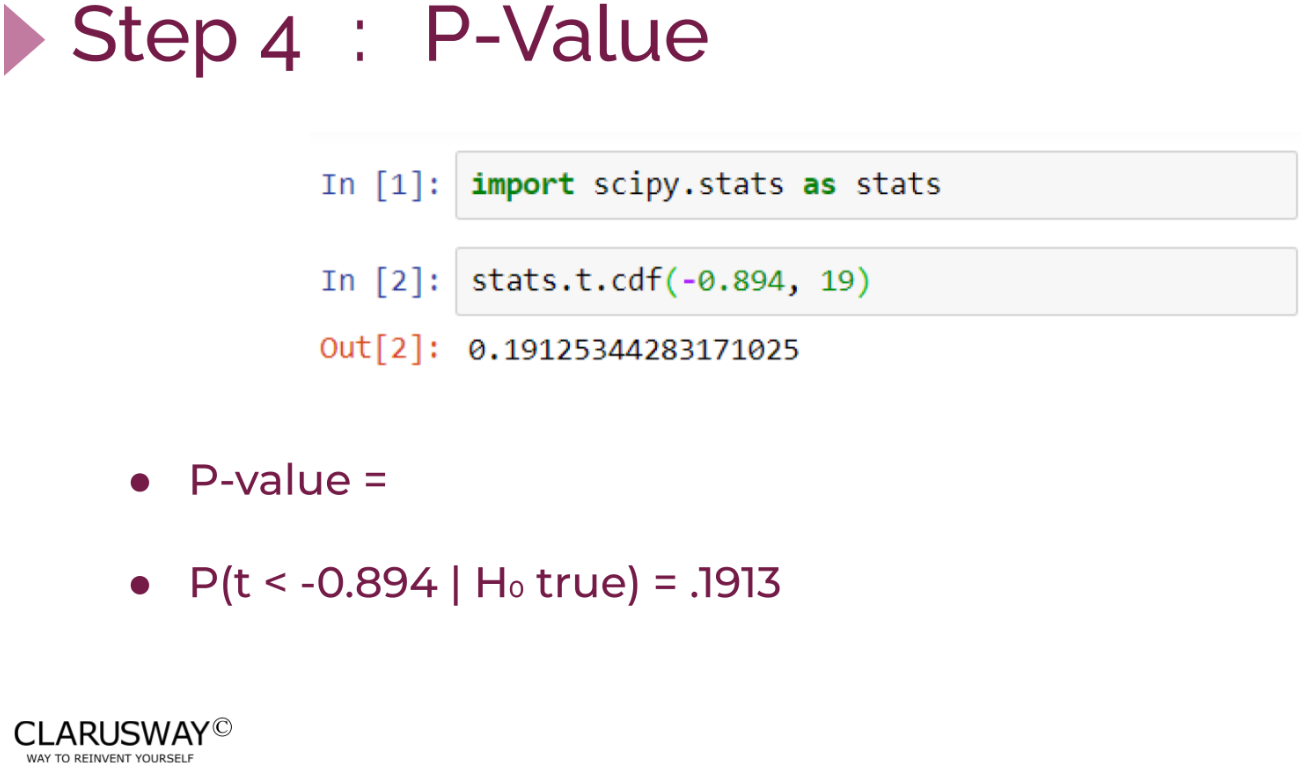

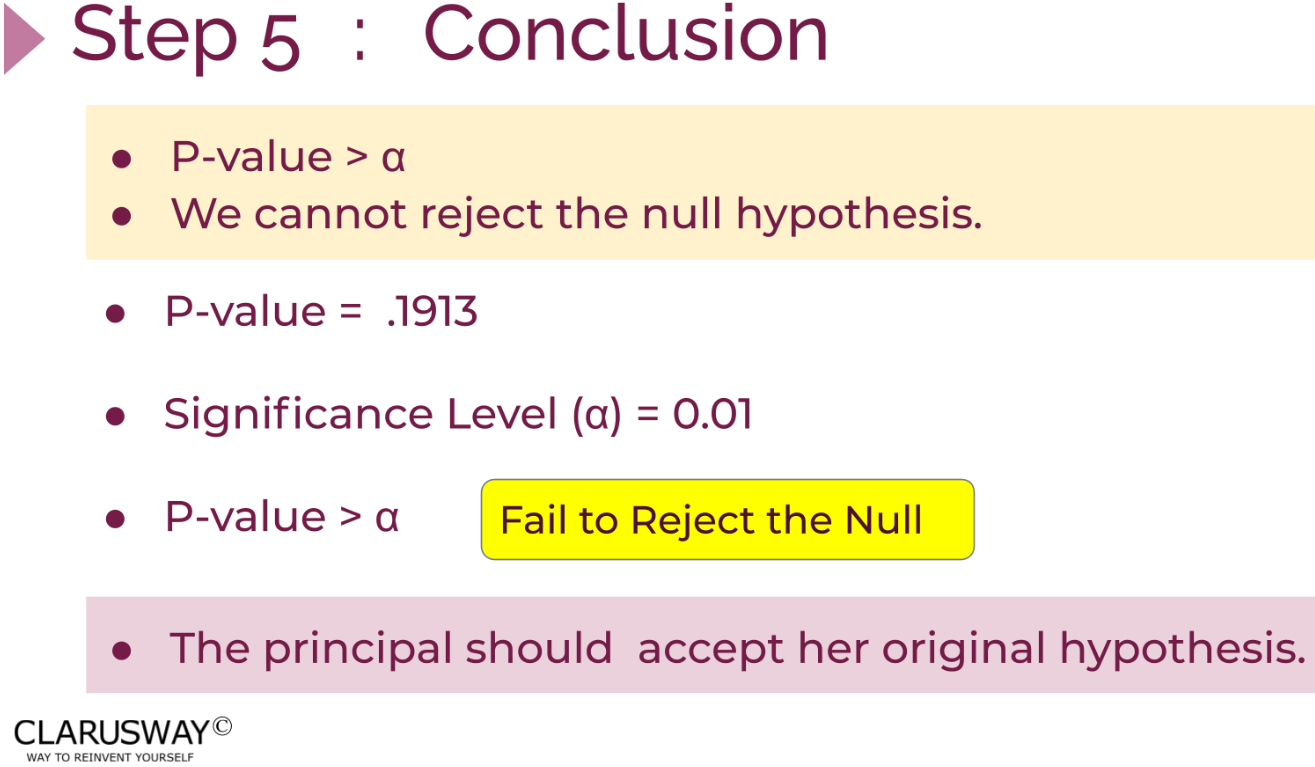

For more information about One Sample T Test in pandas, https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html

- According to Reynolds Intellectual Ability Scales, the average VIQ (Verbal IQ scores based on the four Wechsler (1981) subtests) is about 109.

- In our sample data, we have a sample of 40 cases. 
- Let's test if the average VIQ of people is significantly bigger than 109.

In [5]:
# Brain size and weight and IQ data (Willerman et al. 1991)

df = pd.read_csv("brain_size.csv", sep=";", na_values = ".", index_col = 0)

In [6]:
df.head()

Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
1  Female   133  132  124   118.0    64.5     816932
2    Male   140  150  124     NaN    72.5    1001121
3    Male   139  123  150   143.0    73.3    1038437
4    Male   133  129  128   172.0    68.8     965353
5  Female   137  132  134   147.0    65.0     951545

Hypothesis testing is formulated in terms of two hypotheses: 

• H0: the null hypothesis; 

• H1: the alternative hypothesis.

https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

**WATCH OUT:** We always test a null hypothesis against an alternative one

The practice comes from Karl Popper’s philosophy of science. He believed that the Principle of Induction couldn’t be justified without a circular argument, and he argued for the Falsification Principle. This states that the only thing science can do is to falsify hypotheses, not verify them.

So the null hypothesis is based on evidence from past records , or that which is genereally assumed true. Usually (though not always), the null hypothesis is a statement of equality.

Why do we test the null hypothesis instead of the alternative hypothesis?

https://opentext.wsu.edu/carriecuttler/chapter/13-1-understanding-null-hypothesis-testing/

https://courses.lumenlearning.com/introstats1/chapter/null-and-alternative-hypotheses/

## In the given case Our Hypotheses are:

## H0: μ0 = 109

## H1: μ0 > 109

**Calculation of One Sample t-test manually**

https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/one-sample-t-test/

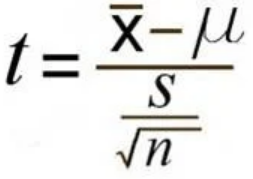

In [7]:
# Calculate the mean of VIQ scores

df["VIQ"].mean()  # Even if sample mean looks like greater than population mean, 
                  # statistically we CANNOT say it is bigger the one in the population or 
                  # reject the null hypothesis without conducting t-test. 

112.35

In [6]:
# Calculate the std of VIQ scores

df["VIQ"].std()

23.616107063199735

In [8]:
df.shape[0]

40

In [9]:
# Calculate the test statistic

t_test = (df["VIQ"].mean() - 109) / (df["VIQ"].std()/np.sqrt(df.shape[0]))

In [10]:
#test statistic which is t value

t_test

0.8971529586323551

In [11]:
# Calculate p-value

1 - stats.t.cdf(0.897152958632355, 39)

0.18757115929257173

**Calculation of One Sample t-test in pandas**

In [18]:
# Use stats.ttest_1samp() to calculate the test statistic and p-value

oneSamp = stats.ttest_1samp(df["VIQ"], 109, alternative = "greater")
oneSamp

Ttest_1sampResult(statistic=0.897152958632355, pvalue=0.1875711592925718)

In [16]:
oneSamp.statistic

0.897152958632355

In [17]:
oneSamp.pvalue

0.1875711592925718

In [19]:
# Compare p-value and alpha

alpha = 0.05

if oneSamp.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Fail to reject


In [12]:
import scipy
print(scipy.__version__)

1.7.1


# Independent Samples T Test

**What is Independent Samples T Test?**

The Independent Samples t Test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test.

For more information about Independent Samples t=test:

https://libguides.library.kent.edu/spss/independentttest

https://statistics.laerd.com/statistical-guides/independent-t-test-statistical-guide.php

https://en.wikipedia.org/wiki/Student%27s_t-test

**The Concepts of Paired & Unpaired?**

Scientific experiments often consist of comparing two or more sets of data. This data is described as unpaired or independent when the sets of data arise from separate individuals or paired when it arises from the same individual at different points in time.

An unpaired t-test (also known as an independent t-test) is a statistical procedure that compares the averages/means of two independent or unrelated groups to determine if there is a significant difference between the two. For example, suppose we are evaluating the effect of a medical treatment, and we enroll 100 subjects into our study, then randomly assign 50 subjects to the treatment group and 50 subjects to the control group. In this case, we have two independent samples and would use the unpaired form of the t-test.

A paired t-test (also known as a dependent or correlated t-test) is a statistical test that compares the averages/means and standard deviations of two related groups to determine if there is a significant difference between the two groups. A typical example of the repeated measures t-test would be where subjects are tested prior to a treatment, say for high blood pressure, and the same subjects are tested again after treatment with a blood-pressure-lowering medication. By comparing the same patient's numbers before and after treatment, we are effectively using each patient as their own control.

Paired t-tests are considered more powerful than unpaired t-tests because using the same participants or item eliminates variation between the samples that could be caused by anything other than what’s being tested.

https://en.wikipedia.org/wiki/Paired_data

https://www.technologynetworks.com/informatics/articles/paired-vs-unpaired-t-test-differences-assumptions-and-hypotheses-330826

**The Concepts of Treatment Group & Control Group?**

The treatment group (also called the experimental group) receives the treatment whose effect the researcher is interested in.

The control group receives either no treatment, a standard treatment whose effect is already known, or a placebo (a fake treatment).

https://www.scribbr.com/methodology/control-group/

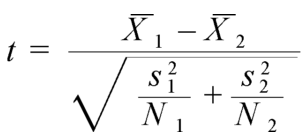

https://magoosh.com/statistics/how-to-perform-an-independent-sample-t-test/

## Arsenic Example

- Arsenic concentration in public drinking water supplies is a potential health risk. 
- An article in the Arizona Republic (May 27, 2001) reported drinking water arsenic concentrations in parts per billion (ppb) for 10 metropolitan Phoenix communities and 10 communities in rural Arizona.
- You can find the data in CSV file.

Determine if there is any difference in mean arsenic concentrations between metropolitan Phoenix communities and communities in rural Arizona.

In [30]:
#Import arsenic dataset

dfArsenic = pd.read_csv("arsenic.csv")

In [31]:
dfArsenic

Metro Phoenix  x1      Rural Arizona  x2
0          Phoenix   3            Rimrock  48
1         Chandler   7           Goodyear  44
2          Gilbert  25          New River  40
3         Glendale  10    Apache Junction  38
4             Mesa  15            Buckeye  33
5  Paradise Valley   6            Nogales  21
6           Peoria  12  Black Canyon City  20
7       Scottsdale  25             Sedona  12
8            Tempe  15             Payson   1
9         Sun City   7        Casa Grande  18

In [27]:
# average Metro Phoenix

dfArsenic["x1"].mean()

12.5

In [49]:
# average Rural Arizona

dfArsenic["x2"].mean()

27.5

In [50]:
px.histogram(dfArsenic, dfArsenic['x1'], nbins=25)

In [46]:
px.bar(dfArsenic, x= dfArsenic['Metro Phoenix'], y=dfArsenic['x1'], labels={
                     "index": "The Number of Measurement",
                     "x1": "Arsenic Concentrations in parts per billion (ppb)"
                     })

In [48]:
px.bar(dfArsenic, x= dfArsenic['Rural Arizona'], y=dfArsenic['x2'], labels={
                     "index": "The Number of Measurement",
                     "x1": "Arsenic Concentrations in parts per billion (ppb)"
                     })

Calculate the T-test for the means of two independent samples of scores.

## In the given case Our Hypotheses are:

## H0: μ1 = μ2

## H1: μ1 != μ2

**NOTE:** If our hypotheses are constructed in terms of equality and unequality, this is two-sided test.

In [51]:
# Calculate test statistics using stats.ttest_ind()

indTest = stats.ttest_ind(df["x1"], df["x2"])

In [54]:
indTest

Ttest_indResult(statistic=-2.7669395785560553, pvalue=0.012704425122128032)

In [52]:
indTest.statistic

-2.7669395785560553

In [53]:
indTest.pvalue

0.012704425122128032

In [69]:
# Decision

alpha = 0.05

if indTest.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


**Calculation of T critical**

In [66]:
stats.t.ppf(0.025, 18) # t critical value found in accordence with α (alpha)

-2.10092204024096

In [67]:
stats.t.ppf(0.975, 18)

2.10092204024096

In [70]:
indTest.statistic  # t value found in accordence with dataset

-2.7669395785560553

**Sample T-Scores Table**

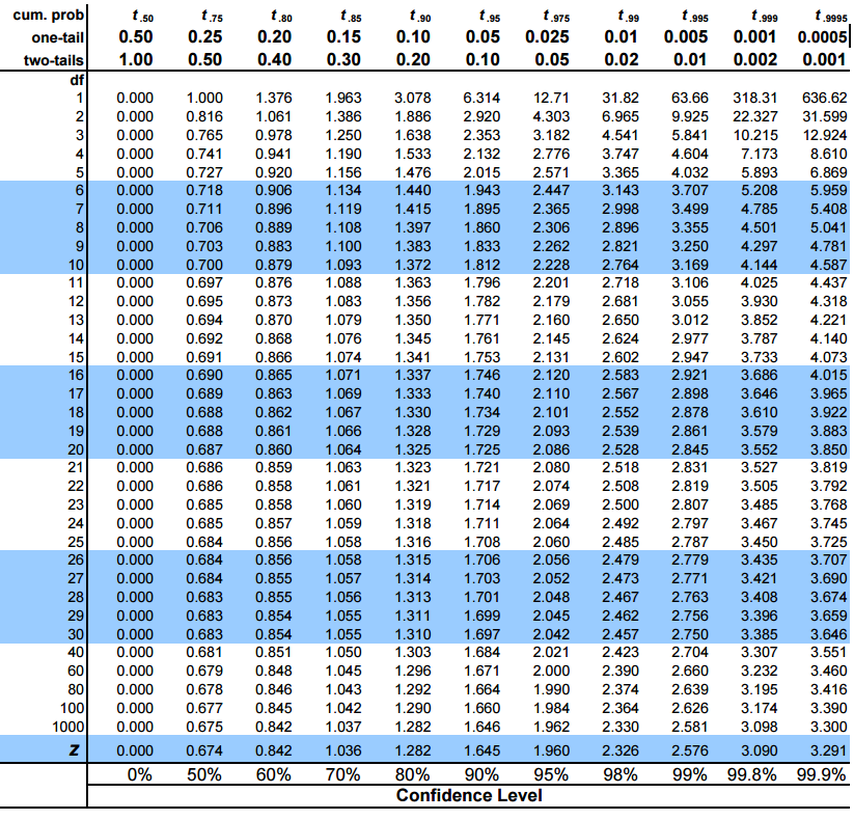

**Sample Z-Scores Table**

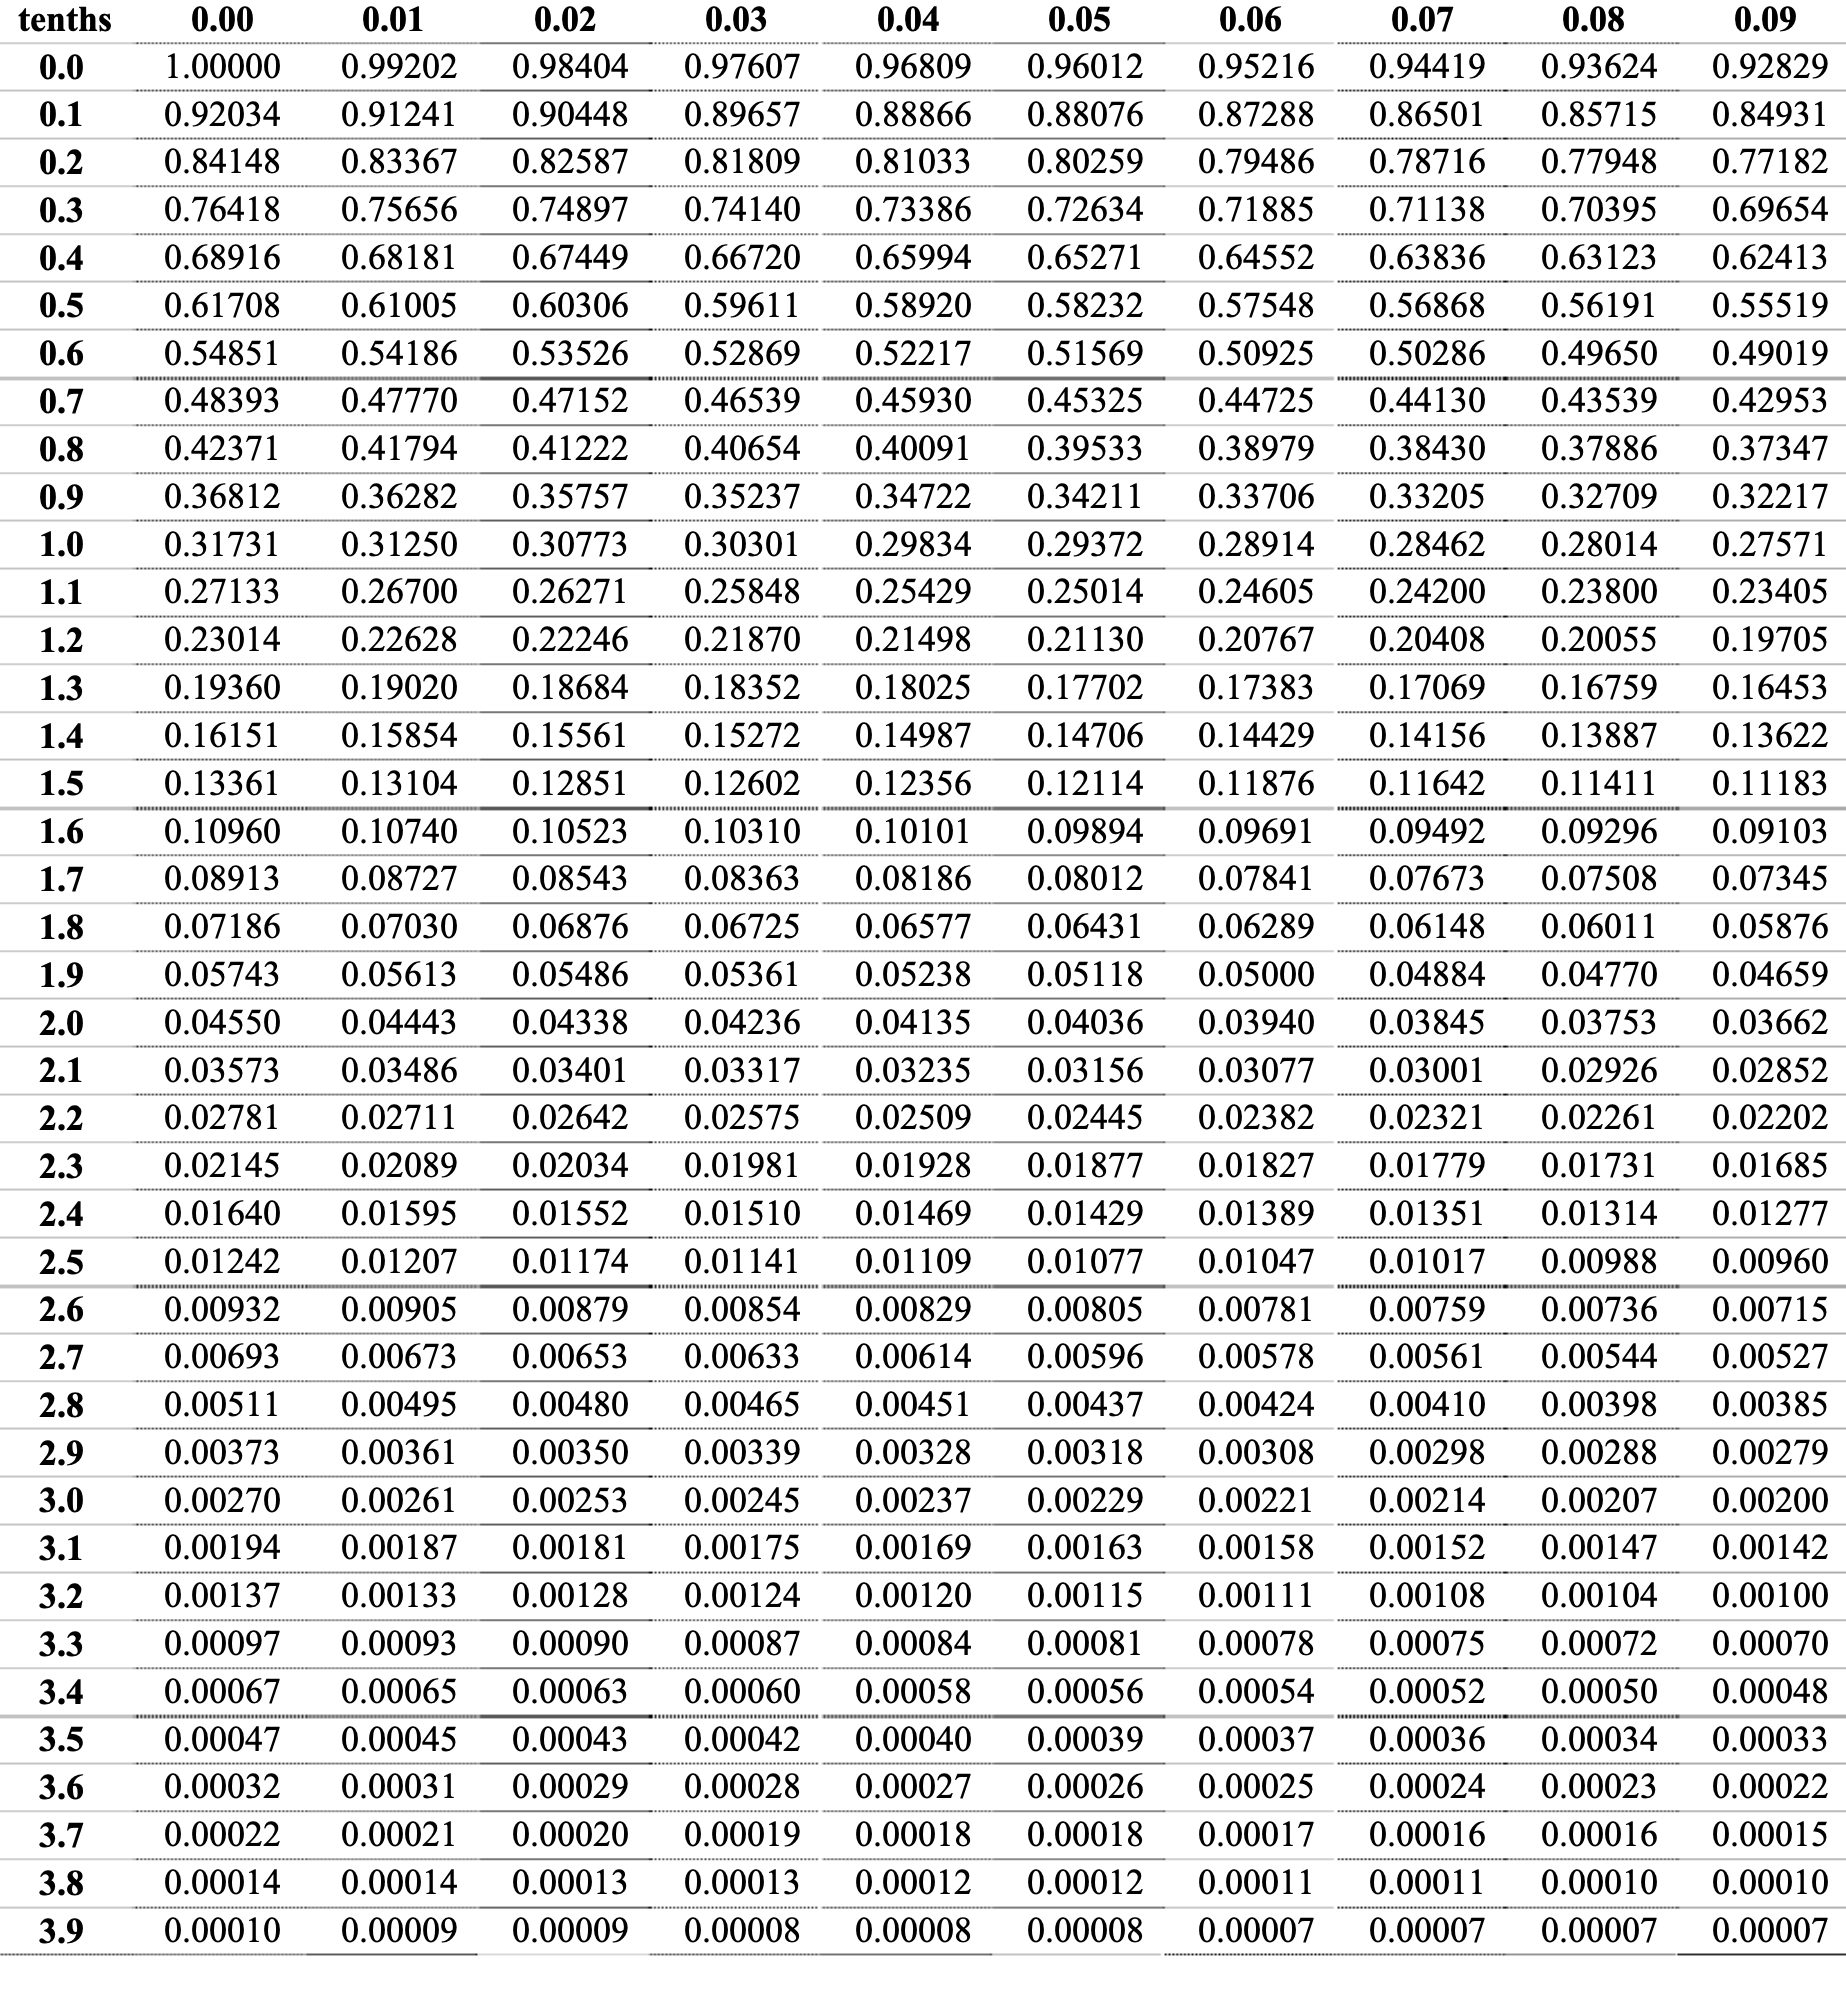

# Paired (Dependent) Samples T Test

## Prozac Data

- Let us consider a simple example of what is often termed "pre/post" data or "pretest/posttest" data. 
- Suppose you wish to test the effect of Prozac on the well-being of depressed individuals, using a standardised "well-being scale" that sums Likert-type items to obtain a score that could range from 0 to 20. 
- Higher scores indicate greater well-being (that is, Prozac is having a positive effect). 
- While there are flaws in this design (e.g., lack of a control group) it will serve as an example of how to analyse such data.

Determine if Prozac enhances well-being in depressed individuals. Use   0.05


In [74]:
# read prozac dataset

dfProzac = pd.read_csv("prozac.csv")

In [75]:
dfProzac

moodpre  moodpost  difference
0        3         5           2
1        0         1           1
2        6         5          -1
3        7         7           0
4        4        10           6
5        3         9           6
6        2         7           5
7        1        11          10
8        4         8           4

## In the given case Our Hypotheses are:

## H0: D ̅  = 0  moodpre = moodpost

## H1: D ̅  > 0  

**(In reality this is what I expect BUT in python moodpost is subtracted from moodpost so we need to write it down like the one below)**

## H1: D ̅  < 0  ==> moodpre - moodpost 

**NOTE:** If our hypotheses are constructed in terms of equality and unequality, this is two-sided test.

**What does D mean in stats?**

The expected difference between the means between an experimental group and a control group, divided by the expected standard deviation.

In [79]:
# Calculate test statistics using stats.ttest_rel() 
# moodpre - moodpost

stats.ttest_rel(prozac["moodpre"], prozac["moodpost"], alternative = "less")

Ttest_relResult(statistic=-3.1428571428571423, pvalue=0.006872912197394246)

In [78]:
# moodpost - moodpre

paired = stats.ttest_rel(prozac["moodpost"], prozac["moodpre"], alternative = "greater")

In [80]:
paired

Ttest_relResult(statistic=3.1428571428571423, pvalue=0.006872912197394246)

In [82]:
paired.statistic

3.1428571428571423

In [81]:
paired.pvalue

0.006872912197394246

In [83]:
# Decision
alpha = 0.05

if paired.pvalue < alpha:
    print("Reject the Null")
else:
    print("Fail to reject")

Reject the Null


## Additional Concepts

**Parametric vs Non-Parametric**

Parametric tests are those that make assumptions about the parameters of the population distribution from which the sample is drawn. This is often the assumption that the population data are normally distributed. Non-parametric tests are “distribution-free” and, as such, can be used for non-Normal variables.

https://statisticsbyjim.com/hypothesis-testing/nonparametric-parametric-tests/

https://en.wikipedia.org/wiki/Parametric_statistics

https://byjus.com/maths/difference-between-parametric-and-nonparametric/

**The Assumption of Normality**

Normality is a property of a random variable that is distributed according to the normal distribution .

Normality plays a central role in both theoretical and practical statistics: a great number of theoretical statistical methods rest on the assumption that the data, or test statistics derived from a sample of data, are normally distributed. Just for this reason, in practical statistics, data are very frequently tested for normality.

For the continuous data, test of the normality is an important step for deciding the measures of central tendency and statistical methods for data analysis. When our data follow normal distribution, parametric tests otherwise nonparametric methods are used to compare the groups.

https://www.statisticshowto.com/assumption-of-normality-test/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6350423/

**Measures of Central Tendency**

Data are commonly describe the observations in a measure of central tendency, which is also called measures of central location, is used to find out the representative value of a data set. The mean, median, and mode are three types of measures of central tendency. Measures of central tendency give us one value (mean or median) for the distribution and this value represents the entire distribution. To make comparisons between two or more groups, representative values of these distributions are compared. It helps in further statistical analysis because many techniques of statistical analysis such as measures of dispersion, skewness, correlation, t-test, and ANOVA test are calculated using value of measures of central tendency. That is why measures of central tendency are also called as measures of the first order. A representative value (measures of central tendency) is considered good when it was calculated using all observations and not affected by extreme values because these values are used to calculate for further measures.

https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

https://en.wikipedia.org/wiki/Central_tendency

**The Assumptions of Type-1 Error & Type-2 Error**

In statistical hypothesis testing, a type I error is the mistaken rejection of the null hypothesis (also known as a "false positive" finding or conclusion; example: "an innocent person is convicted"), while a type II error is the mistaken acceptance of the null hypothesis (also known as a "false negative" finding or conclusion; example: "a guilty person is not convicted")

https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

https://www.scribbr.com/statistics/type-i-and-type-ii-errors/

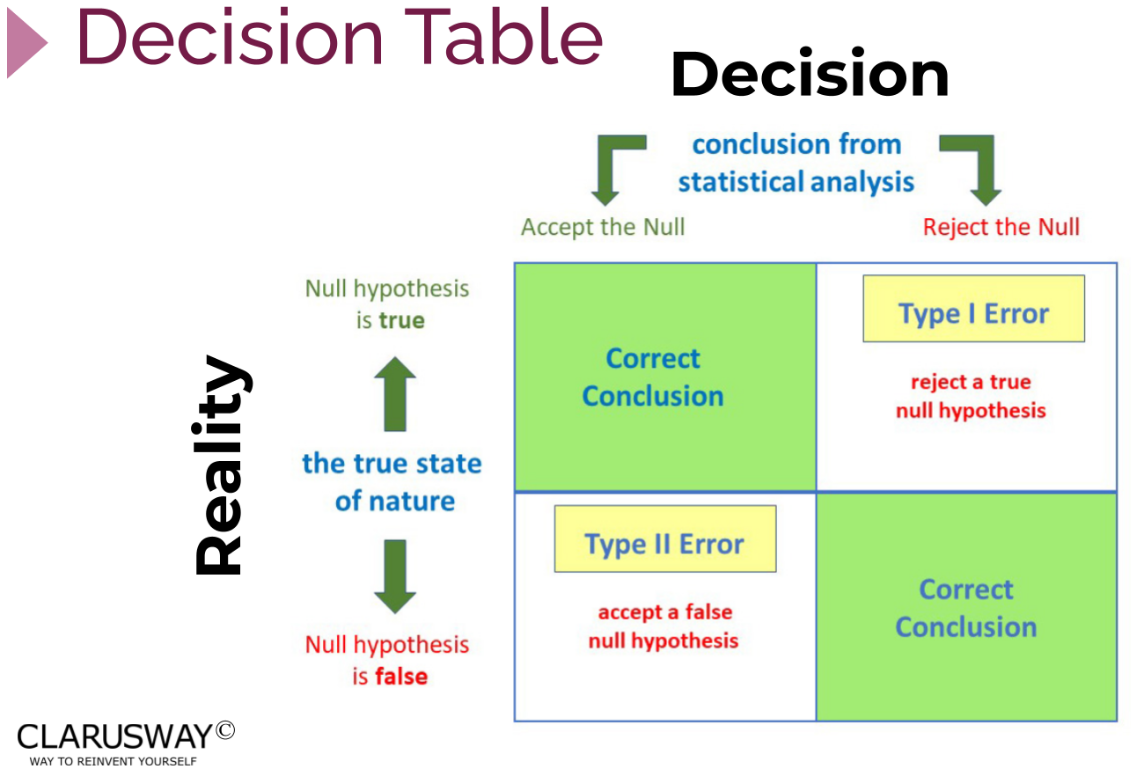